## Final Project Submission

Please fill out: 
* Student name: Vincent Buluma
* Student pace: part time 
* Scheduled project review date/time: 27/7/2025
* Instructor name: Christine Kirimi
* Blog post URL:


# Your code here - remember to use markdown cells for comments as well!



# Overview


This project, will involve  data cleaning, imputation, analysis, and visualization to generate insights for the head of aviation in West Aviation Ltd, which is diversifying it's business by introducing an aviation business segment.

# Business Objective


West Aviation is expanding its potfolio to purchasing and operating airplanes for commercial and private enterprises.  They are in the process of undertaking a SWOT analysis in which potential risks of aircraft is a key parameter. The objective of this analysis is determining which aircraft are the lowest risk for the company to start this new business endeavor. 
The key ouput of the analysis is to translate the findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

# Data Understanding

In [ ]:
#Importing relevent libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [183]:
#Loading the Aviation Data & Visualizing first 5 rows
df=pd.read_csv('data/Aviation_Data.csv')
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11556\2323314815.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/Aviation_Data.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [194]:
#Eploring data to identify the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [184]:
#From information summary above, many rows contain missing values. Below code visualizes the sum of all nulls per column.
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

In [185]:
#Visualizing Null values as percentage for each column organized. This eases the view as well as cleansing approach 
null_percentage_sorted =  (df.isna().mean() * 100).round(1).sort_values(ascending=False)
print(null_percentage_sorted)

Schedule                  86.1
Air.carrier               81.6
FAR.Description           64.6
Aircraft.Category         64.3
Longitude                 62.0
Latitude                  61.9
Airport.Code              44.5
Airport.Name              41.7
Broad.phase.of.flight     31.7
Publication.Date          18.5
Total.Serious.Injuries    15.5
Total.Minor.Injuries      14.8
Total.Fatal.Injuries      14.2
Engine.Type                9.5
Report.Status              8.7
Purpose.of.flight          8.5
Number.of.Engines          8.3
Total.Uninjured            8.2
Weather.Condition          6.6
Aircraft.damage            5.2
Registration.Number        3.1
Injury.Severity            2.7
Country                    1.9
Model                      1.7
Amateur.Built              1.7
Make                       1.7
Location                   1.7
Event.Date                 1.6
Accident.Number            1.6
Event.Id                   1.6
Investigation.Type         0.0
dtype: float64


In [193]:
#Checking for whitespace in string columns
for col in df.select_dtypes(include='object').columns:
    has_whitespace = df[col].str.contains(r'^\s+|\s+$', na=False)
    if has_whitespace.any():
        print(f"Column '{col}' has  white spaces in {has_whitespace.sum()} rows.")

Column 'Location' has  white spaces in 267 rows.
Column 'Report.Status' has  white spaces in 4689 rows.


In [192]:
#From above code, we can see that the Location & Report status column has whitespace. To check unique values in the Location column.
print(df['Location'].unique())
print(df['Report.Status'].unique())

['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'San Manual, AZ'
 'Auburn Hills, MI' 'Brasnorte, ']
['Probable Cause' 'Factual' 'Foreign' ...
 'The pilot did not ensure adequate clearance from construction vehicles during taxi.'
 'The pilot\x92s failure to secure the magneto switch before attempting to hand rotate the engine which resulted in an inadvertent engine start, a runaway airplane, and subsequent impact with parked airplanes. Contributing to the accident was the failure to properly secure the airplane with chocks.'
 'The pilot\x92s loss of control due to a wind gust during landing.']


In [191]:
#Checking duplicate values in the data
duplicate_row = df[df.duplicated()]
df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_row.shape[0]}")
print(duplicate_row.head())

Number of duplicate rows: 1390
      Event.Id Investigation.Type Accident.Number Event.Date Location Country  \
64050      NaN         25-09-2020             NaN        NaN      NaN     NaN   
64052      NaN         25-09-2020             NaN        NaN      NaN     NaN   
64388      NaN         25-09-2020             NaN        NaN      NaN     NaN   
64541      NaN         25-09-2020             NaN        NaN      NaN     NaN   
64552      NaN         25-09-2020             NaN        NaN      NaN     NaN   

      Latitude Longitude Airport.Code Airport.Name  ... Purpose.of.flight  \
64050      NaN       NaN          NaN          NaN  ...               NaN   
64052      NaN       NaN          NaN          NaN  ...               NaN   
64388      NaN       NaN          NaN          NaN  ...               NaN   
64541      NaN       NaN          NaN          NaN  ...               NaN   
64552      NaN       NaN          NaN          NaN  ...               NaN   

      Air.carrier T

Data Cleansing

From data exploration above, we have established that the data has missing values, whitespace in string columns(Location & Report.Status), Mixed pper/lower cases and duplicate rows.
Next step is to clean the data by filling and dropping missing values, changing datatypes for some columns, removing whitespaces as well as duplicates.

In [189]:
#1st we remove whitespace in string columns
df_cleansed = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
#Next we drop rows with any duplicate values
df_cleansed = df_cleansed.drop_duplicates()
#Next we drop columns with more than 60% null values 
threshold = len(df_cleansed) * 0.6
df_cleansed = df_cleansed.dropna(axis=1, thresh=threshold)
#Next we fill the remaining null values in the columns with less than 60% nulls
#For numeric columns, we fill with mean and for categorical columns, we fill with mode. 
for col in df_cleansed.columns:
    null_fraction = df_cleansed[col].isna().mean()
    if 0 < null_fraction < 0.6:
        if df_cleansed[col].dtype == "object":
            mode_val = df_cleansed[col].mode(dropna=True)
            if not mode_val.empty:
                df_cleansed[col] = df_cleansed[col].fillna(mode_val[0])
        else:
            df_cleansed[col] = df_cleansed[col].fillna(df_cleansed[col].mean())




In [211]:
#Colum Make & Model have mixed cases. We can standardize them by converting to title case.
df_cleansed['Make'] = df_cleansed['Make'].str.strip().str.title()

In [212]:
df_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88958 entries, 0 to 90347
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88958 non-null  object        
 1   Investigation.Type      88958 non-null  object        
 2   Accident.Number         88958 non-null  object        
 3   Event.Date              88958 non-null  datetime64[ns]
 4   Location                88958 non-null  object        
 5   Country                 88958 non-null  object        
 6   Injury.Severity         88958 non-null  object        
 7   Aircraft.damage         88958 non-null  object        
 8   Registration.Number     88958 non-null  object        
 9   Make                    88958 non-null  object        
 10  Model                   88958 non-null  object        
 11  Amateur.Built           88958 non-null  object        
 12  Number.of.Engines       88958 non-null  int32      

In [213]:
df_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88958 entries, 0 to 90347
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88958 non-null  object        
 1   Investigation.Type      88958 non-null  object        
 2   Accident.Number         88958 non-null  object        
 3   Event.Date              88958 non-null  datetime64[ns]
 4   Location                88958 non-null  object        
 5   Country                 88958 non-null  object        
 6   Injury.Severity         88958 non-null  object        
 7   Aircraft.damage         88958 non-null  object        
 8   Registration.Number     88958 non-null  object        
 9   Make                    88958 non-null  object        
 10  Model                   88958 non-null  object        
 11  Amateur.Built           88958 non-null  object        
 12  Number.of.Engines       88958 non-null  int32      

In [214]:
#Checking for any remaining null values.Expectation is that there should be no null values left.
df_cleansed.isna().sum()    

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
Total.Injuries            0
dtype: int64

In [215]:
#Checking for duplicate rows in the dataset. Expectation is that there should be no duplicates left.
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
90343    False
90344    False
90345    False
90346    False
90347    False
Length: 90348, dtype: bool

In [216]:
# Checking for  white spaces in string columns. Expectation is that there should be no white spaces left.
for col in ['Location', 'Report.Status']:
 if col in df_cleansed.columns:
    has_whitespace = df_cleansed[col].str.contains(r'^\s+|\s+$', na=False)
    if has_whitespace.any():
        print(f"Column '{col}' has white spaces in {has_whitespace.sum()} rows.")
    else:
        print(f"Column '{col}' has no white spaces.")   

Column 'Location' has no white spaces.
Column 'Report.Status' has no white spaces.


In [217]:
#Lastly, we convert some columns to appropriate datatypes
df_cleansed['Event.Date'] = pd.to_datetime(df_cleansed['Event.Date'], errors='coerce')
df_cleansed['Total.Fatal.Injuries'] = df_cleansed['Total.Fatal.Injuries'].astype('int')  
df_cleansed['Total.Minor.Injuries'] = df_cleansed['Total.Minor.Injuries'].astype('int')
df_cleansed['Total.Serious.Injuries'] = df_cleansed['Total.Serious.Injuries'].astype('int')
df_cleansed['Total.Fatal.Injuries'] = df_cleansed['Total.Fatal.Injuries'].astype('int')
df_cleansed['Number.of.Engines'] = df_cleansed['Number.of.Engines'].astype('int')
df_cleansed['Total.Uninjured'] = df_cleansed['Total.Uninjured'].astype('int')

In [218]:
#Checking the .info of the cleansed data. Expectation is that there should be no nulls, no duplicates, no white spaces and appropriate datatypes.
df_cleansed.info()  

<class 'pandas.core.frame.DataFrame'>
Index: 88958 entries, 0 to 90347
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88958 non-null  object        
 1   Investigation.Type      88958 non-null  object        
 2   Accident.Number         88958 non-null  object        
 3   Event.Date              88958 non-null  datetime64[ns]
 4   Location                88958 non-null  object        
 5   Country                 88958 non-null  object        
 6   Injury.Severity         88958 non-null  object        
 7   Aircraft.damage         88958 non-null  object        
 8   Registration.Number     88958 non-null  object        
 9   Make                    88958 non-null  object        
 10  Model                   88958 non-null  object        
 11  Amateur.Built           88958 non-null  object        
 12  Number.of.Engines       88958 non-null  int32      

In [219]:
df_cleansed.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.Injuries
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Personal,2,0,0,0,UNK,Cruise,Probable Cause,25-09-2020,2
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Personal,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996,4
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Personal,3,0,0,5,IMC,Cruise,Probable Cause,26-02-2007,3
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Personal,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000,2
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,Personal,1,2,0,0,VMC,Approach,Probable Cause,16-04-1980,3


Exploratory Data Analysis

Now that we have cleansed data, the next phase is to analyse it based on business objectives. This includes aggregation and analysis of correlations amongst the variables to answer the question of what mix of factors should the head aviation consider to purchase the right planes to help achieve optimal risk as they seek to expand the business.


In [238]:
# 1. Which Make of Aircraft Model has the highest number of accidents? i.e Susceptible to accidents?
make_model_accidents = df_cleansed[['Make', 'Model']].value_counts().sort_values(ascending=False)
print("Aircraft Model with the highest number of accidents:")
print(make_model_accidents.head())

Aircraft Model with the highest number of accidents:
Make    Model    
Cessna  152          2482
        172          1753
        172N         1163
Piper   PA-28-140     932
Cessna  150           829
Name: count, dtype: int64


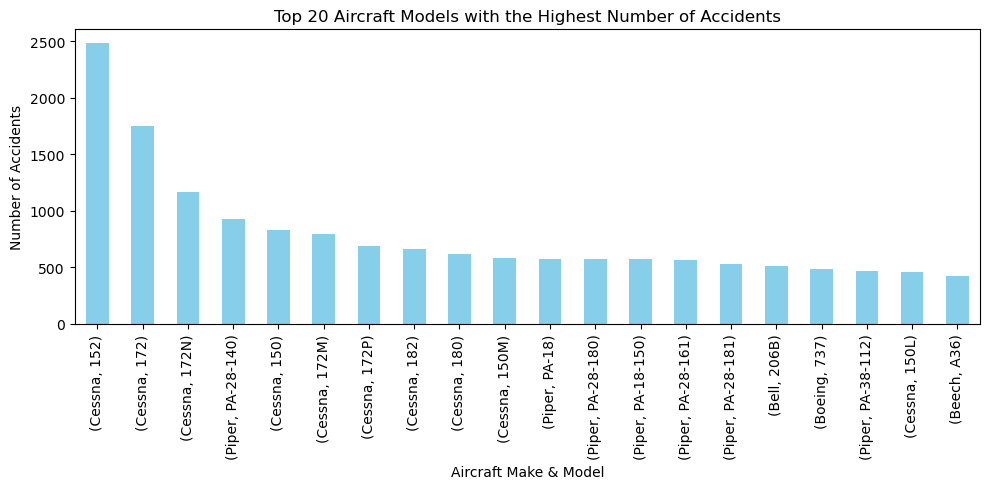

In [241]:
#Vizualizing the top 20 aircraft models with the highest number of accidents
import matplotlib.pyplot as plt
#visualize_make_model_accidents = make_model_accidents.head(20).plot(kind='bar', figsize=(12, 6), color='skyblue')
visualize_make_model_accidents = make_model_accidents.head(20).plot(
    kind='bar', 
    figsize=(10, 5), 
    color='skyblue'
)
plt.title('Top 20 Aircraft Models with the Highest Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('Aircraft Make & Model')
plt.tight_layout()
plt.show()

# Finding 1. 
Cessna Models have the highest number of accidents, followed by piper

In [ ]:
# 2. Which Make of Aircraft is unsafe? i.e 
    # a) has the highest number of Injuries?
#To achieve this, we will create a new column 'Total.Injuries' as the sum of three columns: 'Total.Fatal.Injuries', 'Total.Minor.Injuries', and 'Total.Serious.Injuries'. This will help us analyze the total impact of accidents involving different aircraft makes.
df_cleansed['Total.Injuries'] = (
    df_cleansed['Total.Fatal.Injuries'] +
    df_cleansed['Total.Minor.Injuries'] +
    df_cleansed['Total.Serious.Injuries'] 
     
)

#Now we can group the data by 'Make' and sum the 'Total.Injuries' to find out which make has the highest number of accident injuries.
make_accidents = df_cleansed.groupby('Make')['Total.Injuries'].sum().sort_values(ascending=False)
print(make_accidents.head(20))


Make
Cessna               21509
Boeing               13666
Piper                13505
Beech                 6220
Mcdonnell Douglas     3347
Bell                  3332
Airbus Industrie      1711
Airbus                1623
Douglas               1336
Mooney                1324
Robinson              1161
Bellanca               780
Hughes                 776
De Havilland           745
Aerospatiale           708
Embraer                703
Grumman                687
Lockheed               602
Tupolev                509
Aeronca                442
Name: Total.Injuries, dtype: int32


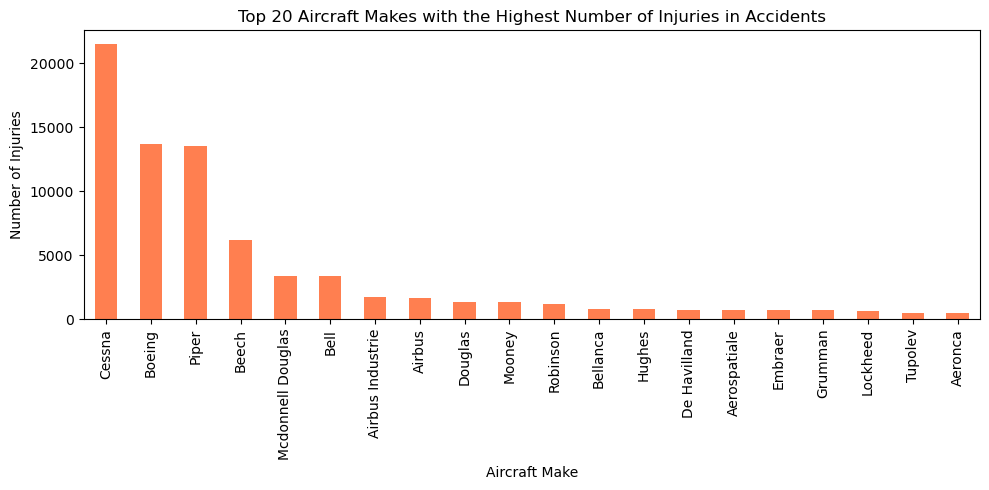

In [242]:
visualize_make_accidents = make_accidents.head(20).plot(
    kind='bar', 
    figsize=(10, 5), 
    color='coral'
)
plt.title('Top 20 Aircraft Makes with the Highest Number of Injuries in Accidents')
plt.ylabel('Number of Injuries')
plt.xlabel('Aircraft Make')
plt.tight_layout()
plt.show()

# Finding 2. 
Cessna has the highest number injuries

In [ ]:
#3 which make and model of aircraft is the safest?
#a) Based people safety: To find the safest type of accident, we can analyze the 'Event.Type' column and the 'Total.Injuries' column. We will group the data by 'Event.Type' and sum the 'Total.Injuries' to find out which type of accident has the least number of injuries.
Most_Safe_aircraft=df_cleansed.groupby(['Make', 'Model'])['Total.Uninjured'].sum().sort_values(ascending=False)
print("Total uninjured per aircraft (Make & Model):")
print(Most_Safe_aircraft.head(10))  

Total uninjured per aircraft (Make & Model):
Make               Model   
Boeing             737         25461
                   777          9439
                   767          6370
                   747-400      6280
Mcdonnell Douglas  DC-10-10     6248
                   DC-10-30     5156
Boeing             747          5062
                   757          4988
                   727-200      4369
                   737-300      4070
Name: Total.Uninjured, dtype: int32


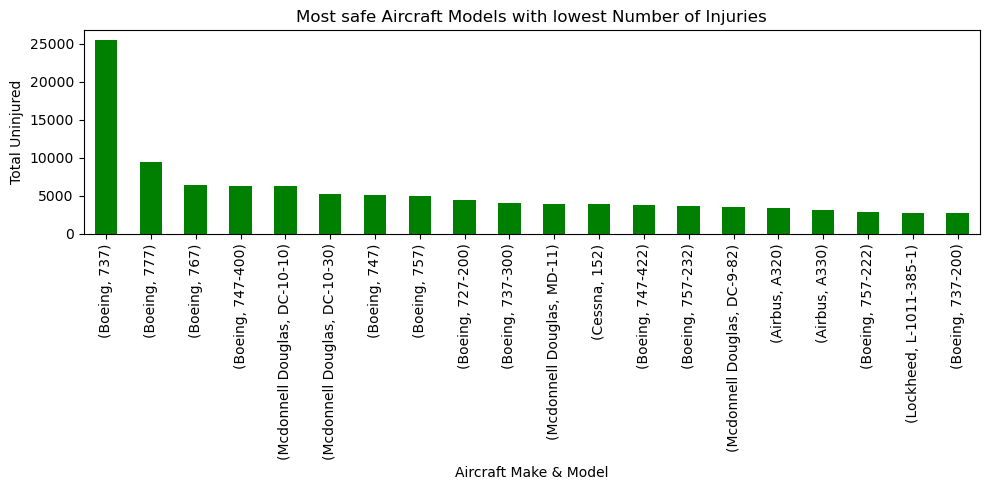

In [243]:
visualize_Most_Safe_aircraft = Most_Safe_aircraft.head(20).plot(
    kind='bar', 
    figsize=(10, 5), 
    color='green'
)
plt.title('Most safe Aircraft Models with lowest Number of Injuries')
plt.ylabel('Total Uninjured')
plt.xlabel('Aircraft Make & Model')
plt.tight_layout()
plt.show()

From the above, Boeing 737 is by far the safest in terms of uninjured

In [ ]:
#b safety based on aircraft itself
    # based on Correlation between aircraft model and aircraft damage
#Count 'Destroyed' and 'Substantial' damages per Make & Model
damage_counts = df_cleansed.groupby(['Make', 'Model'])['Aircraft.damage'].value_counts().unstack(fill_value=0)

# Create a new column with the sum of 'Destroyed' and 'Substantial'
damage_counts['Destroyed_or_Substantial'] = damage_counts.get('Destroyed', 0) + damage_counts.get('Substantial', 0)

print("Destroyed + Substantial damage per aircraft model (top 10):")
print(damage_counts['Destroyed_or_Substantial'].sort_values(ascending=False).head(10))

Destroyed + Substantial damage per aircraft model (top 10):
Make    Model    
Cessna  152          2442
        172          1740
        172N         1156
Piper   PA-28-140     926
Cessna  150           818
        172M          785
        172P          684
        182           649
        180           617
Piper   PA-18         578
Name: Destroyed_or_Substantial, dtype: int64


In [231]:
#Which boeing model is destroyed the most during accidents?
boeing_damage = damage_counts.loc['Boeing', 'Destroyed_or_Substantial']
print("Destroyed + Substantial damage per Boeing model:")
print(boeing_damage.sort_values(ascending=False))

Destroyed + Substantial damage per Boeing model:
Model
737           359
A75N1         101
777            63
767            51
747            47
             ... 
B727            0
767-323ER       0
B-767-332       0
737 7L9         0
B-727-200A      0
Name: Destroyed_or_Substantial, Length: 564, dtype: int64


# Finding 3: 
a) Boeing 737 is the safest plane by far in terms uninjured customers whenever an accident occurs, however, 737 is still the most destroyed boeing family whenever it is involved in the accident
b) Cessna is the most unsafe aircraft by design (in terms of magnitude of destruction) whenever an accident occurs

In [264]:
#Number of accidents per number of engines
accidents_per_model_engine = df_cleansed.groupby(['Make', 'Model', 'Number.of.Engines']).size().reset_index(name='Accident_Count')
print(accidents_per_model_engine.sort_values('Accident_Count', ascending=False).head(10))

         Make      Model  Number.of.Engines  Accident_Count
5010   Cessna        152                  1            2478
5038   Cessna        172                  1            1752
5091   Cessna       172N                  1            1163
14232   Piper  PA-28-140                  1             931
4980   Cessna        150                  1             827
5089   Cessna       172M                  1             797
5094   Cessna       172P                  1             689
5152   Cessna        182                  1             657
5127   Cessna        180                  1             619
5008   Cessna       150M                  1             585


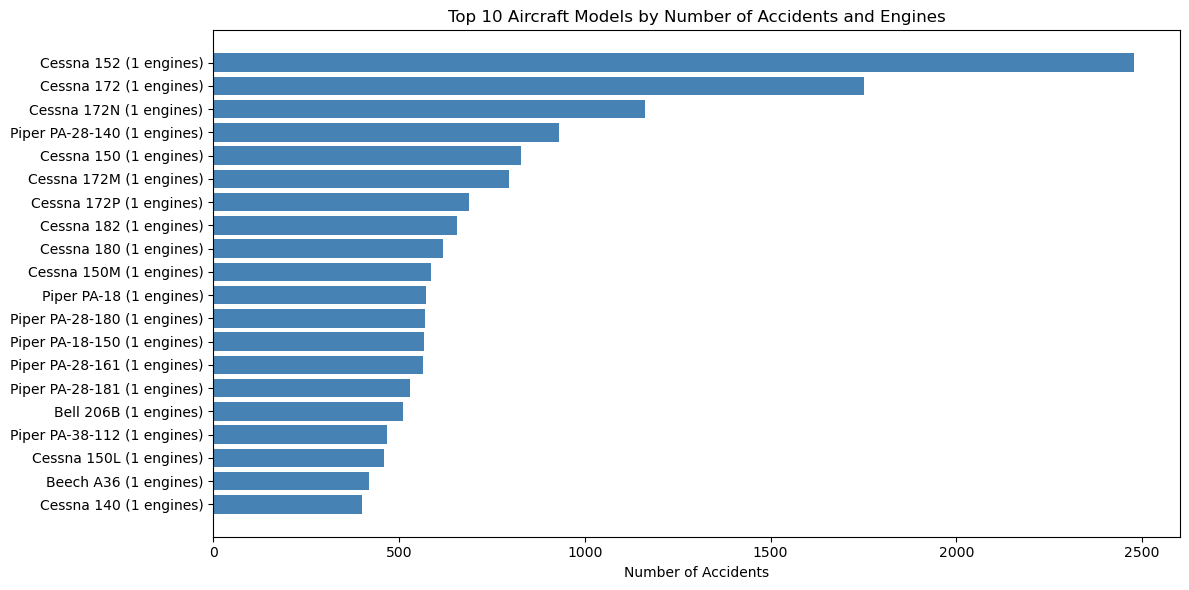

In [267]:
# Plot visualization for number of accidents per aircraft and number of engines

top10 = accidents_per_model_engine.sort_values('Accident_Count', ascending=False).head(20)
plt.figure(figsize=(12,6))
plt.barh(
    top10.apply(lambda x: f"{x['Make']} {x['Model']} ({x['Number.of.Engines']} engines)", axis=1),
    top10['Accident_Count'],
    color='steelblue'
)
plt.xlabel('Number of Accidents')
plt.title('Top 10 Aircraft Models by Number of Accidents and Engines')
plt.gca().invert_yaxis()
plt.tight_layout()

In [272]:
accidents_per_model_engine_type = df_cleansed.groupby(['Make', 'Model', 'Engine.Type']).size().reset_index(name='Accident_Count')
print(accidents_per_model_engine_type.sort_values('Accident_Count', ascending=False).head(50))

           Make       Model    Engine.Type  Accident_Count
5233     Cessna         152  Reciprocating            2479
5259     Cessna         172  Reciprocating            1752
5317     Cessna        172N  Reciprocating            1163
14672     Piper   PA-28-140  Reciprocating             927
5205     Cessna         150  Reciprocating             829
5313     Cessna        172M  Reciprocating             792
5320     Cessna        172P  Reciprocating             688
5380     Cessna         182  Reciprocating             655
5355     Cessna         180  Reciprocating             616
5232     Cessna        150M  Reciprocating             585
14685     Piper   PA-28-180  Reciprocating             571
14553     Piper       PA-18  Reciprocating             571
14564     Piper   PA-18-150  Reciprocating             568
14683     Piper   PA-28-161  Reciprocating             563
14693     Piper   PA-28-181  Reciprocating             527
2821       Bell        206B    Turbo Shaft             4

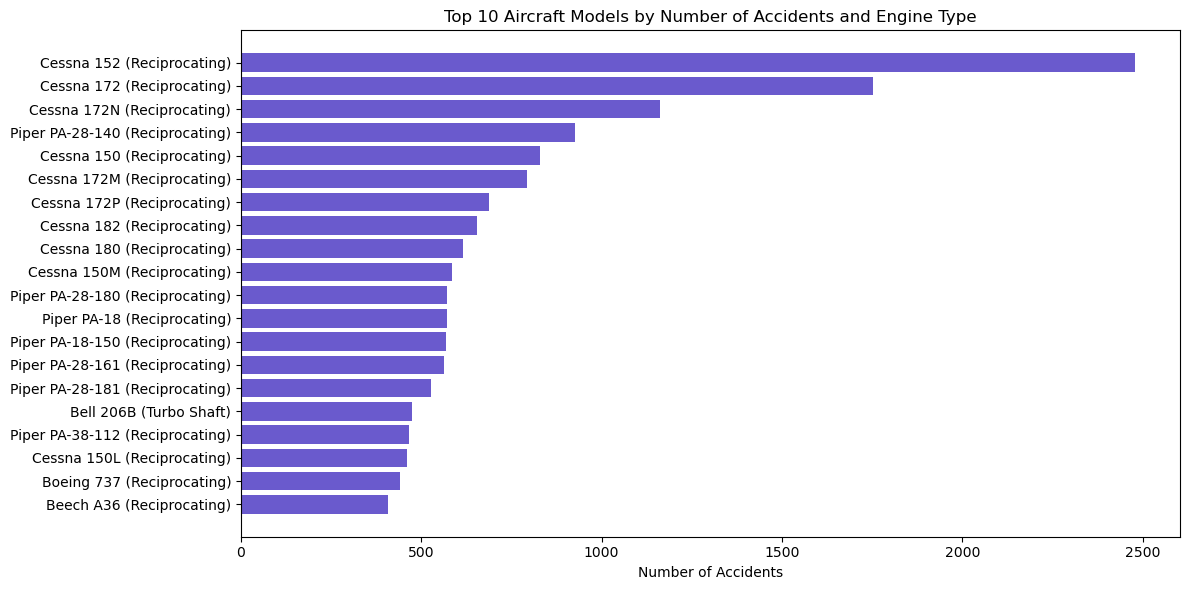

In [276]:
accidents_per_model_engine_type = df_cleansed.groupby(['Make', 'Model', 'Engine.Type']).size().reset_index(name='Accident_Count')
top10 = accidents_per_model_engine_type.sort_values('Accident_Count', ascending=False).head(20)

plt.figure(figsize=(12,6))
plt.barh(
    top10.apply(lambda x: f"{x['Make']} {x['Model']} ({x['Engine.Type']})", axis=1),
    top10['Accident_Count'],
    color='slateblue'
)
plt.xlabel('Number of Accidents')
plt.title('Top 10 Aircraft Models by Number of Accidents and Engine Type')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Finding 4. 
a) Aircrafts with 1 Engine are prone to accidents that those with 2 engines.
b) Aircrafts with reciprocating and Turbo Shaft engine types are prone to accidents

In [281]:
#Correlation between accidents per country
country_accidents = df_cleansed['Country'].value_counts().sort_values(ascending=False)
print("Number of accidents per country:")
print(country_accidents.head(10))


Number of accidents per country:
Country
United States     82543
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
Australia           300
France              236
Spain               226
Bahamas             216
Germany             215
Name: count, dtype: int64


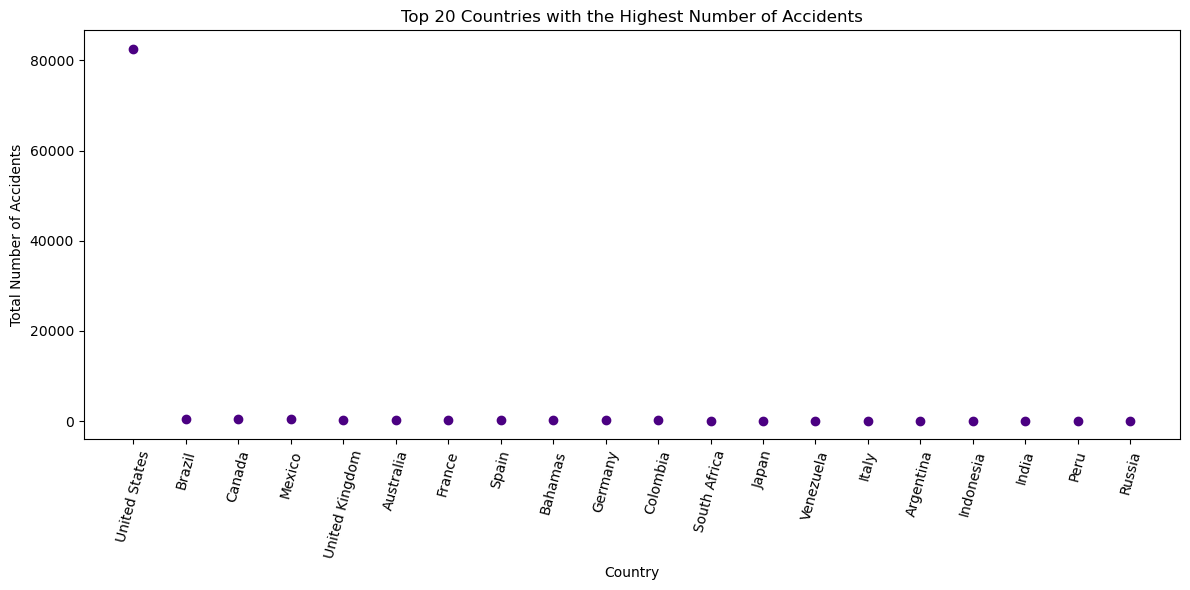

In [280]:
#Visualize_country_accidents
plt.figure(figsize=(12, 6))
plt.scatter(country_accidents.head(20).index, country_accidents.head(20).values, color='indigo')
plt.title('Top 20 Countries with the Highest Number of Accidents')
plt.ylabel('Total Number of Accidents')
plt.xlabel('Country')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

# Finding 5:
Most accidents occurs in the United States.

## Reccomendations

Based on the correlation analysis infered above, this section gives recommendations to the company to consider as they review the risks involved in the venture.

 1.  Based on finding 1 & 2 that Cessna Models have the highest number of:
 a) Accidents, 
 b) Highest number of injuries to passengers in cases of accidents
 b) Destroyed & Substantially destroyed aircrafts in cases of accidents
 
 Therefore, the company should minimize or avoid purchasing of Cessna aircrafts especially models 152, 172 & 172N

2. Based on finding 3:
Boeing is the safest aircraft as it has:
a) Highest uninjured passengers in case of accident
b) Relatively fewer aircrafts damaged during an accident

Therefore, the company should Maximize/optimize purchasing of Boeing aircrafts especially models 737.

3. Based on finding 4: Most accidents involve aircraft with 1 engine, Therefore the company should by aircrafts with more than 1 engine to reduce the risk of accidents.

3. Based on finding 5: Most accidents happen in the United, Therefore the company can review the possibilities of operating their aircrafts outside the united states.

Visualization of the cleansed data in Tableau

Finally, we export cleansed data for Tableau dashboarding using
df_cleansed.to_csv('cleansed_aviation_data.csv', index=False)
